In [27]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

df=pd.read_csv('listings_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3560 non-null   int64  
 1   listing_url                                   3560 non-null   object 
 2   scrape_id                                     3560 non-null   int64  
 3   last_scraped                                  3560 non-null   object 
 4   name                                          3560 non-null   object 
 5   description                                   3530 non-null   object 
 6   neighborhood_overview                         2720 non-null   object 
 7   picture_url                                   3560 non-null   object 
 8   host_id                                       3560 non-null   int64  
 9   host_url                                      3560 non-null   o

In [28]:
#preliminary cleaning of data

# dropping all columns that are not factors
to_drop = list(train_set.columns)
keep = ['host_is_superhost','host_verifications','neighbourhood_cleansed','property_type','room_type',
        'accommodates','bedrooms','beds','price','number_of_reviews','n_bathrooms','reviews_per_month']
for i in keep:
    to_drop.remove(i)
    
    
df = df.drop(columns=to_drop)
df = pd.get_dummies(df)

train_set,test_set=train_test_split(df,test_size=0.25)

train_features= train_set.copy()
test_features=test_set.copy()
train_labels = train_set.pop('price')
test_labels = test_set.pop('price')
print(train_set.columns)

Index(['accommodates', 'bedrooms', 'beds', 'number_of_reviews',
       'reviews_per_month', 'n_bathrooms', 'host_is_superhost_f',
       'host_is_superhost_t',
       'host_verifications_['email', 'phone', 'facebook', 'google', 'offline_government_id', 'kba', 'selfie', 'government_id', 'identity_manual']',
       'host_verifications_['email', 'phone', 'facebook', 'google', 'reviews', 'jumio', 'government_id']',
       ...
       'property_type_Room in hotel',
       'property_type_Shared room in condominium (condo)',
       'property_type_Shared room in rental unit',
       'property_type_Shared room in residential home',
       'property_type_Shipping container', 'property_type_Tiny house',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object', length=334)


In [29]:
#normalization layer of data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))

In [30]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 335)              671       
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                21504     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26,400
Trainable params: 25,729
Non-trainable params: 671
_________________________________________________________________


In [31]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2, epochs=1000)

Epoch 1/1000
67/67 - 0s - loss: 174.4122 - val_loss: 153.4491 - 438ms/epoch - 7ms/step
Epoch 2/1000
67/67 - 0s - loss: 121.8978 - val_loss: 82.7813 - 124ms/epoch - 2ms/step
Epoch 3/1000
67/67 - 0s - loss: 72.4000 - val_loss: 63.1522 - 85ms/epoch - 1ms/step
Epoch 4/1000
67/67 - 0s - loss: 59.3477 - val_loss: 57.1343 - 82ms/epoch - 1ms/step
Epoch 5/1000
67/67 - 0s - loss: 53.1721 - val_loss: 54.1926 - 90ms/epoch - 1ms/step
Epoch 6/1000
67/67 - 0s - loss: 48.5733 - val_loss: 52.1122 - 93ms/epoch - 1ms/step
Epoch 7/1000
67/67 - 0s - loss: 44.9051 - val_loss: 49.8197 - 93ms/epoch - 1ms/step
Epoch 8/1000
67/67 - 0s - loss: 41.3484 - val_loss: 47.8725 - 91ms/epoch - 1ms/step
Epoch 9/1000
67/67 - 0s - loss: 37.4470 - val_loss: 45.8733 - 91ms/epoch - 1ms/step
Epoch 10/1000
67/67 - 0s - loss: 33.9132 - val_loss: 42.5108 - 92ms/epoch - 1ms/step
Epoch 11/1000
67/67 - 0s - loss: 30.1725 - val_loss: 39.3319 - 89ms/epoch - 1ms/step
Epoch 12/1000
67/67 - 0s - loss: 26.7742 - val_loss: 36.1400 - 89ms/e

Epoch 99/1000
67/67 - 0s - loss: 3.6599 - val_loss: 22.8492 - 75ms/epoch - 1ms/step
Epoch 100/1000
67/67 - 0s - loss: 3.4122 - val_loss: 22.7617 - 74ms/epoch - 1ms/step
Epoch 101/1000
67/67 - 0s - loss: 3.6860 - val_loss: 22.5681 - 74ms/epoch - 1ms/step
Epoch 102/1000
67/67 - 0s - loss: 3.3970 - val_loss: 22.9719 - 78ms/epoch - 1ms/step
Epoch 103/1000
67/67 - 0s - loss: 3.4989 - val_loss: 22.4285 - 73ms/epoch - 1ms/step
Epoch 104/1000
67/67 - 0s - loss: 3.4965 - val_loss: 22.6504 - 73ms/epoch - 1ms/step
Epoch 105/1000
67/67 - 0s - loss: 3.4188 - val_loss: 22.7410 - 74ms/epoch - 1ms/step
Epoch 106/1000
67/67 - 0s - loss: 3.3765 - val_loss: 22.7703 - 73ms/epoch - 1ms/step
Epoch 107/1000
67/67 - 0s - loss: 3.5284 - val_loss: 22.5618 - 76ms/epoch - 1ms/step
Epoch 108/1000
67/67 - 0s - loss: 3.5549 - val_loss: 22.5453 - 90ms/epoch - 1ms/step
Epoch 109/1000
67/67 - 0s - loss: 3.4279 - val_loss: 22.6681 - 101ms/epoch - 2ms/step
Epoch 110/1000
67/67 - 0s - loss: 3.4600 - val_loss: 22.6866 - 10

Epoch 196/1000
67/67 - 0s - loss: 2.9678 - val_loss: 22.5611 - 77ms/epoch - 1ms/step
Epoch 197/1000
67/67 - 0s - loss: 2.9396 - val_loss: 22.3299 - 78ms/epoch - 1ms/step
Epoch 198/1000
67/67 - 0s - loss: 2.8175 - val_loss: 22.5235 - 75ms/epoch - 1ms/step
Epoch 199/1000
67/67 - 0s - loss: 2.7829 - val_loss: 22.6872 - 75ms/epoch - 1ms/step
Epoch 200/1000
67/67 - 0s - loss: 2.8825 - val_loss: 22.5405 - 74ms/epoch - 1ms/step
Epoch 201/1000
67/67 - 0s - loss: 2.9367 - val_loss: 22.7779 - 75ms/epoch - 1ms/step
Epoch 202/1000
67/67 - 0s - loss: 2.8299 - val_loss: 22.9548 - 74ms/epoch - 1ms/step
Epoch 203/1000
67/67 - 0s - loss: 2.9436 - val_loss: 22.6471 - 76ms/epoch - 1ms/step
Epoch 204/1000
67/67 - 0s - loss: 2.8407 - val_loss: 22.4929 - 77ms/epoch - 1ms/step
Epoch 205/1000
67/67 - 0s - loss: 2.8340 - val_loss: 22.3805 - 74ms/epoch - 1ms/step
Epoch 206/1000
67/67 - 0s - loss: 2.8096 - val_loss: 22.4085 - 74ms/epoch - 1ms/step
Epoch 207/1000
67/67 - 0s - loss: 2.7122 - val_loss: 22.5927 - 73

Epoch 293/1000
67/67 - 0s - loss: 2.6161 - val_loss: 22.6143 - 75ms/epoch - 1ms/step
Epoch 294/1000
67/67 - 0s - loss: 2.6143 - val_loss: 22.2681 - 75ms/epoch - 1ms/step
Epoch 295/1000
67/67 - 0s - loss: 2.5581 - val_loss: 22.4281 - 73ms/epoch - 1ms/step
Epoch 296/1000
67/67 - 0s - loss: 2.5558 - val_loss: 22.3776 - 76ms/epoch - 1ms/step
Epoch 297/1000
67/67 - 0s - loss: 2.6400 - val_loss: 22.7548 - 75ms/epoch - 1ms/step
Epoch 298/1000
67/67 - 0s - loss: 2.5648 - val_loss: 22.3081 - 82ms/epoch - 1ms/step
Epoch 299/1000
67/67 - 0s - loss: 2.5131 - val_loss: 22.2321 - 74ms/epoch - 1ms/step
Epoch 300/1000
67/67 - 0s - loss: 2.5774 - val_loss: 22.4825 - 77ms/epoch - 1ms/step
Epoch 301/1000
67/67 - 0s - loss: 2.5742 - val_loss: 22.2514 - 74ms/epoch - 1ms/step
Epoch 302/1000
67/67 - 0s - loss: 2.5032 - val_loss: 22.3538 - 75ms/epoch - 1ms/step
Epoch 303/1000
67/67 - 0s - loss: 2.4816 - val_loss: 22.5491 - 74ms/epoch - 1ms/step
Epoch 304/1000
67/67 - 0s - loss: 2.6093 - val_loss: 22.3853 - 74

Epoch 390/1000
67/67 - 0s - loss: 2.2857 - val_loss: 22.1692 - 76ms/epoch - 1ms/step
Epoch 391/1000
67/67 - 0s - loss: 2.5237 - val_loss: 22.0606 - 73ms/epoch - 1ms/step
Epoch 392/1000
67/67 - 0s - loss: 2.3488 - val_loss: 22.1979 - 74ms/epoch - 1ms/step
Epoch 393/1000
67/67 - 0s - loss: 2.3283 - val_loss: 21.8571 - 74ms/epoch - 1ms/step
Epoch 394/1000
67/67 - 0s - loss: 2.1854 - val_loss: 22.2050 - 73ms/epoch - 1ms/step
Epoch 395/1000
67/67 - 0s - loss: 2.3325 - val_loss: 21.9199 - 75ms/epoch - 1ms/step
Epoch 396/1000
67/67 - 0s - loss: 2.3748 - val_loss: 22.0676 - 75ms/epoch - 1ms/step
Epoch 397/1000
67/67 - 0s - loss: 2.3844 - val_loss: 22.6327 - 73ms/epoch - 1ms/step
Epoch 398/1000
67/67 - 0s - loss: 2.3540 - val_loss: 21.9839 - 76ms/epoch - 1ms/step
Epoch 399/1000
67/67 - 0s - loss: 2.2634 - val_loss: 22.1537 - 77ms/epoch - 1ms/step
Epoch 400/1000
67/67 - 0s - loss: 2.2854 - val_loss: 22.1389 - 75ms/epoch - 1ms/step
Epoch 401/1000
67/67 - 0s - loss: 2.3290 - val_loss: 21.7989 - 74

Epoch 487/1000
67/67 - 0s - loss: 2.1534 - val_loss: 21.7689 - 75ms/epoch - 1ms/step
Epoch 488/1000
67/67 - 0s - loss: 2.0437 - val_loss: 21.9281 - 76ms/epoch - 1ms/step
Epoch 489/1000
67/67 - 0s - loss: 2.1095 - val_loss: 21.8771 - 75ms/epoch - 1ms/step
Epoch 490/1000
67/67 - 0s - loss: 2.2056 - val_loss: 21.7931 - 74ms/epoch - 1ms/step
Epoch 491/1000
67/67 - 0s - loss: 2.0820 - val_loss: 21.9969 - 75ms/epoch - 1ms/step
Epoch 492/1000
67/67 - 0s - loss: 2.0087 - val_loss: 21.7884 - 75ms/epoch - 1ms/step
Epoch 493/1000
67/67 - 0s - loss: 2.1240 - val_loss: 21.9295 - 76ms/epoch - 1ms/step
Epoch 494/1000
67/67 - 0s - loss: 2.3556 - val_loss: 21.8420 - 74ms/epoch - 1ms/step
Epoch 495/1000
67/67 - 0s - loss: 2.1339 - val_loss: 22.0367 - 76ms/epoch - 1ms/step
Epoch 496/1000
67/67 - 0s - loss: 2.1400 - val_loss: 21.9189 - 75ms/epoch - 1ms/step
Epoch 497/1000
67/67 - 0s - loss: 2.2093 - val_loss: 21.9072 - 77ms/epoch - 1ms/step
Epoch 498/1000
67/67 - 0s - loss: 2.0146 - val_loss: 22.0812 - 90

Epoch 584/1000
67/67 - 0s - loss: 1.9831 - val_loss: 21.7892 - 76ms/epoch - 1ms/step
Epoch 585/1000
67/67 - 0s - loss: 1.9737 - val_loss: 21.6537 - 74ms/epoch - 1ms/step
Epoch 586/1000
67/67 - 0s - loss: 1.9157 - val_loss: 21.7162 - 72ms/epoch - 1ms/step
Epoch 587/1000
67/67 - 0s - loss: 1.9425 - val_loss: 21.9303 - 73ms/epoch - 1ms/step
Epoch 588/1000
67/67 - 0s - loss: 1.9490 - val_loss: 21.8117 - 74ms/epoch - 1ms/step
Epoch 589/1000
67/67 - 0s - loss: 2.1086 - val_loss: 21.7358 - 77ms/epoch - 1ms/step
Epoch 590/1000
67/67 - 0s - loss: 1.9216 - val_loss: 22.0396 - 77ms/epoch - 1ms/step
Epoch 591/1000
67/67 - 0s - loss: 2.1165 - val_loss: 21.7024 - 76ms/epoch - 1ms/step
Epoch 592/1000
67/67 - 0s - loss: 2.0517 - val_loss: 21.8247 - 77ms/epoch - 1ms/step
Epoch 593/1000
67/67 - 0s - loss: 2.1551 - val_loss: 21.9465 - 74ms/epoch - 1ms/step
Epoch 594/1000
67/67 - 0s - loss: 2.0076 - val_loss: 21.8384 - 74ms/epoch - 1ms/step
Epoch 595/1000
67/67 - 0s - loss: 1.9607 - val_loss: 21.8183 - 74

Epoch 681/1000
67/67 - 0s - loss: 1.9844 - val_loss: 22.0749 - 77ms/epoch - 1ms/step
Epoch 682/1000
67/67 - 0s - loss: 2.0312 - val_loss: 21.5709 - 74ms/epoch - 1ms/step
Epoch 683/1000
67/67 - 0s - loss: 1.8407 - val_loss: 21.7156 - 72ms/epoch - 1ms/step
Epoch 684/1000
67/67 - 0s - loss: 2.0879 - val_loss: 21.7847 - 75ms/epoch - 1ms/step
Epoch 685/1000
67/67 - 0s - loss: 1.9329 - val_loss: 21.6682 - 77ms/epoch - 1ms/step
Epoch 686/1000
67/67 - 0s - loss: 1.9298 - val_loss: 21.7622 - 74ms/epoch - 1ms/step
Epoch 687/1000
67/67 - 0s - loss: 1.8579 - val_loss: 21.5250 - 74ms/epoch - 1ms/step
Epoch 688/1000
67/67 - 0s - loss: 1.8987 - val_loss: 21.7207 - 74ms/epoch - 1ms/step
Epoch 689/1000
67/67 - 0s - loss: 1.8661 - val_loss: 21.6204 - 74ms/epoch - 1ms/step
Epoch 690/1000
67/67 - 0s - loss: 1.9735 - val_loss: 21.6086 - 72ms/epoch - 1ms/step
Epoch 691/1000
67/67 - 0s - loss: 1.8706 - val_loss: 21.8060 - 77ms/epoch - 1ms/step
Epoch 692/1000
67/67 - 0s - loss: 2.0719 - val_loss: 21.9513 - 74

Epoch 778/1000
67/67 - 0s - loss: 2.0472 - val_loss: 21.5372 - 75ms/epoch - 1ms/step
Epoch 779/1000
67/67 - 0s - loss: 1.9229 - val_loss: 21.5935 - 73ms/epoch - 1ms/step
Epoch 780/1000
67/67 - 0s - loss: 1.8874 - val_loss: 21.6948 - 75ms/epoch - 1ms/step
Epoch 781/1000
67/67 - 0s - loss: 1.9360 - val_loss: 21.7564 - 78ms/epoch - 1ms/step
Epoch 782/1000
67/67 - 0s - loss: 1.7717 - val_loss: 21.5070 - 75ms/epoch - 1ms/step
Epoch 783/1000
67/67 - 0s - loss: 1.9362 - val_loss: 21.9338 - 73ms/epoch - 1ms/step
Epoch 784/1000
67/67 - 0s - loss: 1.7774 - val_loss: 21.3962 - 74ms/epoch - 1ms/step
Epoch 785/1000
67/67 - 0s - loss: 1.9054 - val_loss: 21.7360 - 73ms/epoch - 1ms/step
Epoch 786/1000
67/67 - 0s - loss: 1.8155 - val_loss: 21.5888 - 73ms/epoch - 1ms/step
Epoch 787/1000
67/67 - 0s - loss: 1.7340 - val_loss: 21.7377 - 75ms/epoch - 1ms/step
Epoch 788/1000
67/67 - 0s - loss: 1.8609 - val_loss: 21.3868 - 75ms/epoch - 1ms/step
Epoch 789/1000
67/67 - 0s - loss: 1.8228 - val_loss: 21.6546 - 75

Epoch 875/1000
67/67 - 0s - loss: 1.8954 - val_loss: 21.4948 - 89ms/epoch - 1ms/step
Epoch 876/1000
67/67 - 0s - loss: 1.7825 - val_loss: 21.3876 - 87ms/epoch - 1ms/step
Epoch 877/1000
67/67 - 0s - loss: 1.7088 - val_loss: 21.4132 - 93ms/epoch - 1ms/step
Epoch 878/1000
67/67 - 0s - loss: 1.7732 - val_loss: 21.5079 - 91ms/epoch - 1ms/step
Epoch 879/1000
67/67 - 0s - loss: 1.6976 - val_loss: 21.7832 - 89ms/epoch - 1ms/step
Epoch 880/1000
67/67 - 0s - loss: 1.8174 - val_loss: 21.4562 - 95ms/epoch - 1ms/step
Epoch 881/1000
67/67 - 0s - loss: 1.7062 - val_loss: 21.6375 - 89ms/epoch - 1ms/step
Epoch 882/1000
67/67 - 0s - loss: 1.7077 - val_loss: 21.4758 - 91ms/epoch - 1ms/step
Epoch 883/1000
67/67 - 0s - loss: 1.6805 - val_loss: 21.6924 - 95ms/epoch - 1ms/step
Epoch 884/1000
67/67 - 0s - loss: 1.7127 - val_loss: 21.3555 - 89ms/epoch - 1ms/step
Epoch 885/1000
67/67 - 0s - loss: 1.7618 - val_loss: 21.4315 - 96ms/epoch - 1ms/step
Epoch 886/1000
67/67 - 0s - loss: 1.6684 - val_loss: 21.8542 - 97

Epoch 972/1000
67/67 - 0s - loss: 1.6284 - val_loss: 21.1519 - 84ms/epoch - 1ms/step
Epoch 973/1000
67/67 - 0s - loss: 1.6786 - val_loss: 21.4149 - 84ms/epoch - 1ms/step
Epoch 974/1000
67/67 - 0s - loss: 1.6758 - val_loss: 21.2522 - 83ms/epoch - 1ms/step
Epoch 975/1000
67/67 - 0s - loss: 1.6291 - val_loss: 21.2050 - 91ms/epoch - 1ms/step
Epoch 976/1000
67/67 - 0s - loss: 1.7283 - val_loss: 21.3948 - 92ms/epoch - 1ms/step
Epoch 977/1000
67/67 - 0s - loss: 1.5815 - val_loss: 21.3160 - 91ms/epoch - 1ms/step
Epoch 978/1000
67/67 - 0s - loss: 1.6666 - val_loss: 21.4334 - 86ms/epoch - 1ms/step
Epoch 979/1000
67/67 - 0s - loss: 1.7107 - val_loss: 21.3083 - 87ms/epoch - 1ms/step
Epoch 980/1000
67/67 - 0s - loss: 1.7336 - val_loss: 21.1313 - 90ms/epoch - 1ms/step
Epoch 981/1000
67/67 - 0s - loss: 1.6422 - val_loss: 21.1729 - 84ms/epoch - 1ms/step
Epoch 982/1000
67/67 - 0s - loss: 1.6214 - val_loss: 21.2619 - 80ms/epoch - 1ms/step
Epoch 983/1000
67/67 - 0s - loss: 1.8593 - val_loss: 21.4387 - 78

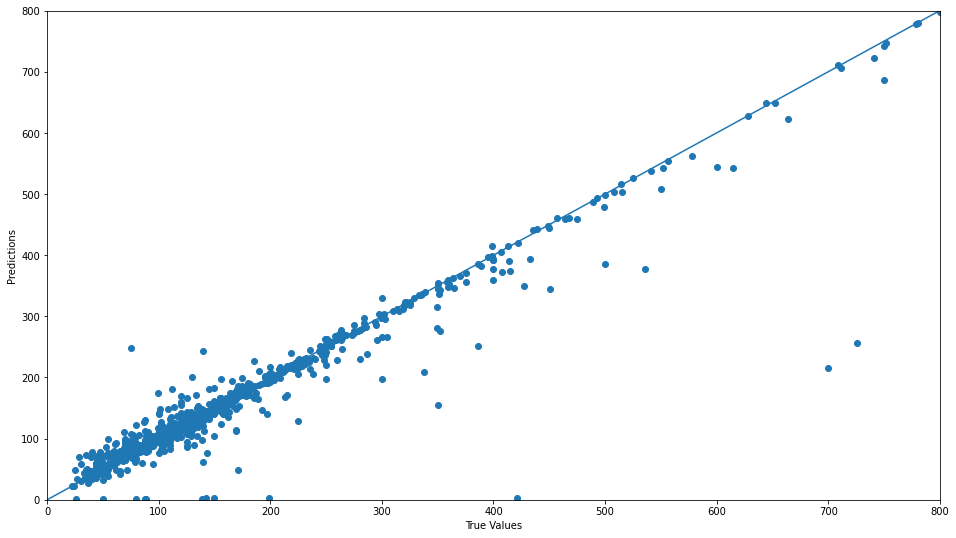

In [50]:
#prediction
test_predictions = dnn_model.predict(test_features).flatten()
plt.figure(figsize=(16, 9))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)